In [11]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression

In [12]:
purchase_data = pd.read_csv('purchase data.csv')
scaler = pickle.load(open('scaler.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca=pickle.load(open('kmeans_pca.pickel','rb'))
features=purchase_data[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
purchase_data_std = scaler.transform(features)
purchase_data_pca = pca.transform(purchase_data_std)
purchase_data_cluster_pca = kmeans_pca.predict(purchase_data_pca)
purchase_predictors=purchase_data.copy()
purchase_predictors['Segment']= purchase_data_cluster_pca
segment_dummies = pd.get_dummies(purchase_data_cluster_pca,prefix='Segment',prefix_sep='_')
purchase_predictors = pd.concat([purchase_predictors,segment_dummies],axis=1)
predictive_data = purchase_predictors
predictive_data

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,False,False,True,False
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,False,False,True,False
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,False,False,True,False
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,False,False,True,False
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,2,False,False,True,False
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,2,False,False,True,False
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,2,False,False,True,False
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,2,False,False,True,False


In [13]:
Y = predictive_data['Incidence']

In [14]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
58688    0
58689    0
58690    0
58691    1
58692    0
Name: Incidence, Length: 58693, dtype: int64

In [16]:
X =pd.DataFrame()
X['Mean Price']=(predictive_data['Price_1']+
                predictive_data['Price_2']+
                predictive_data['Price_3']+
                predictive_data['Price_4']+
                predictive_data['Price_5'])/5
X

,Mean Price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030
...,...
58688,2.060
58689,2.060
58690,2.086
58691,2.092


In [18]:
model_purchase =LogisticRegression(solver='sag')
model_purchase.fit(X,Y)

LogisticRegression(solver='sag')

In [19]:
model_purchase.coef_

array([[-2.3482359]])

In [21]:
predictive_data[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [45]:
price_range = np.arange(0.5,3.5,0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [46]:
df_price_range = pd.DataFrame(price_range)

In [47]:
Y_price = model_purchase.predict_proba(df_price_range)
Y_price

E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.08211715, 0.91788285],
       [0.08390456, 0.91609544],
       [0.08572725, 0.91427275],
       [0.08758575, 0.91241425],
       [0.08948059, 0.91051941],
       [0.09141232, 0.90858768],
       [0.09338148, 0.90661852],
       [0.0953886 , 0.9046114 ],
       [0.09743422, 0.90256578],
       [0.09951889, 0.90048111],
       [0.10164314, 0.89835686],
       [0.1038075 , 0.8961925 ],
       [0.10601252, 0.89398748],
       [0.10825871, 0.89174129],
       [0.11054661, 0.88945339],
       [0.11287674, 0.88712326],
       [0.11524962, 0.88475038],
       [0.11766577, 0.88233423],
       [0.12012569, 0.87987431],
       [0.12262989, 0.87737011],
       [0.12517887, 0.87482113],
       [0.12777312, 0.87222688],
       [0.13041312, 0.86958688],
       [0.13309934, 0.86690066],
       [0.13583224, 0.86416776],
       [0.13861229, 0.86138771],
       [0.14143993, 0.85856007],
       [0.14431558, 0.85568442],
       [0.14723967, 0.85276033],
       [0.15021261, 0.84978739],
       [0.

In [48]:
purchase_price_range = Y_price[:][:,1]

In [49]:
price_elasticity = model_purchase.coef_[:,0]*price_range*(1-purchase_price_range)

In [50]:
df_price_elasticity = pd.DataFrame(price_range)
df_price_elasticity

,0
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [51]:
df_price_elasticity = df_price_elasticity.rename(columns={0:"Price Point"})
df_price_elasticity["Mean PE"]=price_elasticity
df_price_elasticity

,Price Point,Mean PE
0,0.50,-0.096415
1,0.51,-0.100484
2,0.52,-0.104680
3,0.53,-0.109006
4,0.54,-0.113466
...,...,...
295,3.45,-8.013574
296,3.46,-8.038824
297,3.47,-8.064041
298,3.48,-8.089223


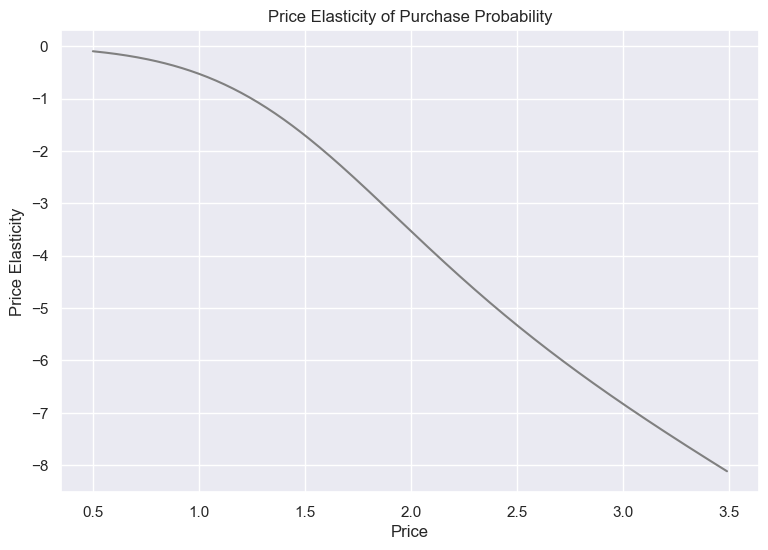

In [53]:
plt.figure(figsize=(9,6))
plt.plot(price_range,price_elasticity,color='grey')
plt.xlabel('Price')
plt.ylabel('Price Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

In [56]:
purchase_data_segemnt_1 = purchase_predictors[purchase_predictors['Segment']==1]

In [57]:
Y = purchase_data_segemnt_1['Incidence']

In [58]:
X= pd.DataFrame()
X['Mean Price'] = (purchase_data_segemnt_1['Price_1']+
                   purchase_data_segemnt_1['Price_2']+
                   purchase_data_segemnt_1['Price_3']+
                   purchase_data_segemnt_1['Price_4']+
                   purchase_data_segemnt_1['Price_5'])/5

In [63]:
model_purchase_segment_1 = LogisticRegression(solver='sag')
model_purchase_segment_1.fit(X,Y)

LogisticRegression(solver='sag')

In [64]:
model_purchase_segment_1.coef_

array([[-1.7118569]])

In [65]:
Y_price_segment_1 = model_purchase_segment_1.predict_proba(df_price_range)
purchase_price_range_segment_1 = Y_price_segment_1[:][:,1]
price_elasticity_segment_1 = model_purchase_segment_1.coef_[:,0]*price_range*(1-purchase_price_range_segment_1)

E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
df_price_elasticity['Segment 1']=price_elasticity_segment_1
df_price_elasticity

,Price Point,Mean PE,Segment 1
0,0.50,-0.096415,-0.119093
1,0.51,-0.100484,-0.123276
2,0.52,-0.104680,-0.127553
3,0.53,-0.109006,-0.131924
4,0.54,-0.113466,-0.136392
...,...,...,...
295,3.45,-8.013574,-5.680637
296,3.46,-8.038824,-5.700793
297,3.47,-8.064041,-5.720913
298,3.48,-8.089223,-5.740996


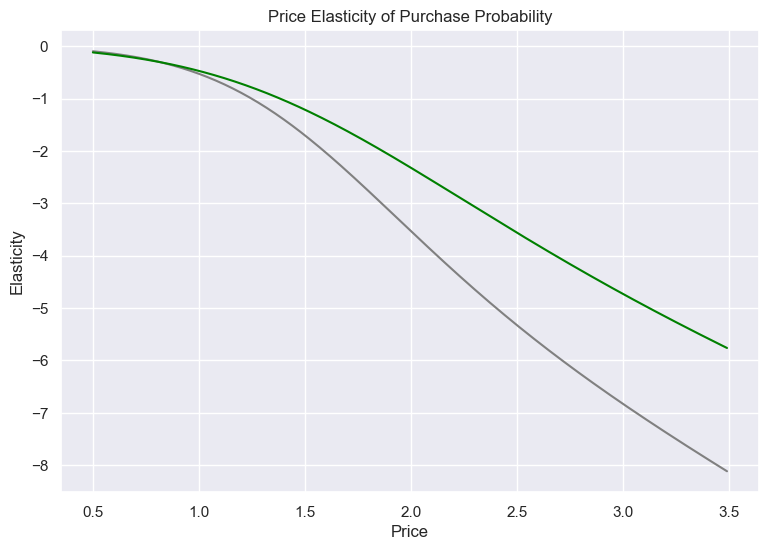

In [71]:
plt.figure(figsize=(9,6))
plt.plot(price_range,price_elasticity,color='grey')
plt.plot(price_range,price_elasticity_segment_1,color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

In [72]:
purchase_data_segemnt_2= purchase_predictors[purchase_predictors['Segment']==2]
Y = purchase_data_segemnt_2['Incidence']
X= pd.DataFrame()
X['Mean Price'] = (purchase_data_segemnt_2['Price_1']+
                   purchase_data_segemnt_2['Price_2']+
                   purchase_data_segemnt_2['Price_3']+
                   purchase_data_segemnt_2['Price_4']+
                   purchase_data_segemnt_2['Price_5'])/5
model_purchase_segment_2 = LogisticRegression(solver='sag')
model_purchase_segment_2.fit(X,Y)
model_purchase_segment_2.coef_
Y_price_segment_2 = model_purchase_segment_2.predict_proba(df_price_range)
purchase_price_range_segment_2 = Y_price_segment_2[:][:,1]
price_elasticity_segment_2 = model_purchase_segment_2.coef_[:,0]*price_range*(1-purchase_price_range_segment_2)
df_price_elasticity['Segment 2']=price_elasticity_segment_2

E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [73]:
purchase_data_segemnt_3= purchase_predictors[purchase_predictors['Segment']==3]
Y = purchase_data_segemnt_3['Incidence']
X= pd.DataFrame()
X['Mean Price'] = (purchase_data_segemnt_3['Price_1']+
                   purchase_data_segemnt_3['Price_2']+
                   purchase_data_segemnt_3['Price_3']+
                   purchase_data_segemnt_3['Price_4']+
                   purchase_data_segemnt_3['Price_5'])/5
model_purchase_segment_3 = LogisticRegression(solver='sag')
model_purchase_segment_3.fit(X,Y)
model_purchase_segment_3.coef_
Y_price_segment_3 = model_purchase_segment_3.predict_proba(df_price_range)
purchase_price_range_segment_3 = Y_price_segment_3[:][:,1]
price_elasticity_segment_3 = model_purchase_segment_3.coef_[:,0]*price_range*(1-purchase_price_range_segment_3)
df_price_elasticity['Segment 3']=price_elasticity_segment_3

E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [85]:
purchase_data_segemnt_4= purchase_predictors[purchase_predictors['Segment']==0]
Y = purchase_data_segemnt_4['Incidence']
X= pd.DataFrame()
X['Mean Price'] = (purchase_data_segemnt_4['Price_1']+
                   purchase_data_segemnt_4['Price_2']+
                   purchase_data_segemnt_4['Price_3']+
                   purchase_data_segemnt_4['Price_4']+
                   purchase_data_segemnt_4['Price_5'])/5
model_purchase_segment_4 = LogisticRegression(solver='sag')
model_purchase_segment_4.fit(X,Y)
model_purchase_segment_4.coef_
Y_price_segment_4 = model_purchase_segment_4.predict_proba(df_price_range)
purchase_price_range_segment_4 = Y_price_segment_4[:][:,1]
price_elasticity_segment_4 = model_purchase_segment_4.coef_[:,0]*price_range*(1-purchase_price_range_segment_3)
df_price_elasticity['Segment 4']=price_elasticity_segment_4
df_price_elasticity

E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Price Point,Mean PE,Segment 1,Segment 2,Segment 3,Segment 4
0,0.50,-0.096415,-0.119093,-0.030952,-0.168345,-0.203759
1,0.51,-0.100484,-0.123276,-0.032720,-0.173278,-0.209731
2,0.52,-0.104680,-0.127553,-0.034576,-0.178282,-0.215787
3,0.53,-0.109006,-0.131924,-0.036522,-0.183358,-0.221930
4,0.54,-0.113466,-0.136392,-0.038563,-0.188504,-0.228160
...,...,...,...,...,...,...
295,3.45,-8.013574,-5.680637,-12.537789,-4.025364,-4.872174
296,3.46,-8.038824,-5.700793,-12.574695,-4.040234,-4.890172
297,3.47,-8.064041,-5.720913,-12.611585,-4.055088,-4.908150
298,3.48,-8.089223,-5.740996,-12.648458,-4.069925,-4.926109


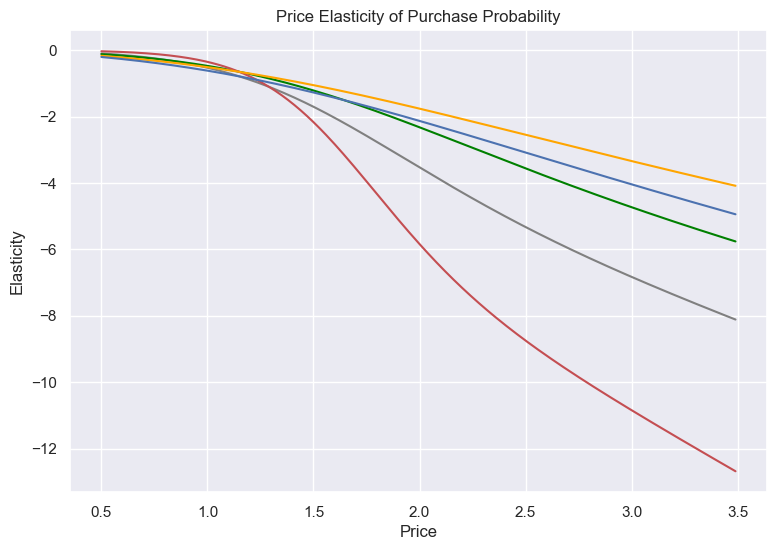

In [78]:
plt.figure(figsize=(9,6))
plt.plot(price_range,price_elasticity,color='grey')
plt.plot(price_range,price_elasticity_segment_1,color='green')
plt.plot(price_range,price_elasticity_segment_2,color='r')
plt.plot(price_range,price_elasticity_segment_3,color='orange')
plt.plot(price_range,price_elasticity_segment_4,color='b')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

In [80]:
Y = purchase_predictors['Incidence']

In [81]:
X = pd.DataFrame()
X['Mean Price']=(predictive_data['Price_1']+
                predictive_data['Price_2']+
                predictive_data['Price_3']+
                predictive_data['Price_4']+
                predictive_data['Price_5'])/5
X['Mean Promotion']=(predictive_data['Promotion_1']+
                predictive_data['Promotion_2']+
                predictive_data['Promotion_3']+
                predictive_data['Promotion_4']+
                predictive_data['Promotion_5'])/5
X

,Mean Price,Mean Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0
...,...,...
58688,2.060,0.2
58689,2.060,0.0
58690,2.086,0.0
58691,2.092,0.0


In [82]:
model_incidence_promotion = LogisticRegression(solver='sag')
model_incidence_promotion.fit(X,Y)
model_incidence_promotion.coef_

array([[-1.49379935,  0.56167193]])

In [140]:
price_elasticity_promotion =pd.DataFrame(price_range)
price_elasticity_promotion = price_elasticity_promotion.rename(columns={0:"Mean Price"})
price_elasticity_promotion

,Mean Price
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [141]:
price_elasticity_promotion['Mean Promotion']=1
price_elasticity_promotion

,Mean Price,Mean Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1
...,...,...
295,3.45,1
296,3.46,1
297,3.47,1
298,3.48,1


In [142]:
Y_promotion = model_incidence_promotion.predict_proba(price_elasticity_promotion)

In [143]:
promo = Y_promotion[:,1]
price_elasticity_promo = (model_incidence_promotion.coef_[:,0]*price_range)*(1-promo)

In [144]:
df_price_elasticity['Elasticity Promotion 1'] = price_elasticity_promo

In [145]:
df_price_elasticity

,Price Point,Mean PE,Segment 1,Segment 2,Segment 3,Segment 4,Elasticity Promotion 1,Elasticity Promotion 2
0,0.50,-0.096415,-0.119093,-0.030952,-0.168345,-0.203759,-0.125690,-0.195604
1,0.51,-0.100484,-0.123276,-0.032720,-0.173278,-0.209731,-0.129804,-0.201723
2,0.52,-0.104680,-0.127553,-0.034576,-0.178282,-0.215787,-0.133998,-0.207945
3,0.53,-0.109006,-0.131924,-0.036522,-0.183358,-0.221930,-0.138271,-0.214271
4,0.54,-0.113466,-0.136392,-0.038563,-0.188504,-0.228160,-0.142625,-0.220700
...,...,...,...,...,...,...,...,...
295,3.45,-8.013574,-5.680637,-12.537789,-4.025364,-4.872174,-4.860638,-4.982356
296,3.46,-8.038824,-5.700793,-12.574695,-4.040234,-4.890172,-4.878839,-4.999261
297,3.47,-8.064041,-5.720913,-12.611585,-4.055088,-4.908150,-4.897009,-5.016146
298,3.48,-8.089223,-5.740996,-12.648458,-4.069925,-4.926109,-4.915149,-5.033011


In [146]:
price_elasticity_no_promotion =pd.DataFrame(price_range)
price_elasticity_no_promotion = price_elasticity_no_promotion.rename(columns={0:"Mean Price"})
price_elasticity_no_promotion['Mean Promotion']=0
Y_promotion = model_incidence_promotion.predict_proba(price_elasticity_no_promotion)
promo = Y_promotion[:,1]
price_elasticity_no_promo = (model_incidence_promotion.coef_[:,0]*price_range)*(1-promo)
df_price_elasticity['Elasticity Promotion 2'] = price_elasticity_no_promo
df_price_elasticity

,Price Point,Mean PE,Segment 1,Segment 2,Segment 3,Segment 4,Elasticity Promotion 1,Elasticity Promotion 2
0,0.50,-0.096415,-0.119093,-0.030952,-0.168345,-0.203759,-0.125690,-0.195604
1,0.51,-0.100484,-0.123276,-0.032720,-0.173278,-0.209731,-0.129804,-0.201723
2,0.52,-0.104680,-0.127553,-0.034576,-0.178282,-0.215787,-0.133998,-0.207945
3,0.53,-0.109006,-0.131924,-0.036522,-0.183358,-0.221930,-0.138271,-0.214271
4,0.54,-0.113466,-0.136392,-0.038563,-0.188504,-0.228160,-0.142625,-0.220700
...,...,...,...,...,...,...,...,...
295,3.45,-8.013574,-5.680637,-12.537789,-4.025364,-4.872174,-4.860638,-4.982356
296,3.46,-8.038824,-5.700793,-12.574695,-4.040234,-4.890172,-4.878839,-4.999261
297,3.47,-8.064041,-5.720913,-12.611585,-4.055088,-4.908150,-4.897009,-5.016146
298,3.48,-8.089223,-5.740996,-12.648458,-4.069925,-4.926109,-4.915149,-5.033011


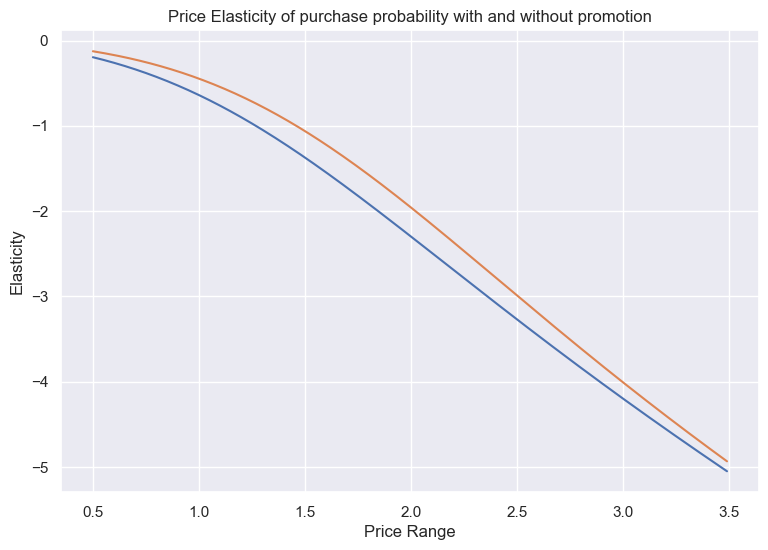

In [150]:
plt.figure(figsize=(9,6))
plt.plot(price_range,price_elasticity_no_promo)
plt.plot(price_range,price_elasticity_promo)
plt.xlabel("Price Range")
plt.ylabel("Elasticity")
plt.title("Price Elasticity of purchase probability with and without promotion")
plt.show()